---
# Data Related Job Descriptions Across 10 Countries

This data was scraped from Indeed across 10 countries:

- Australia
- Canada
- France
- Hong Kong
- Japan
- Singapore
- South Africa
- Switzerland
- United Kingdom
- United States

Three roles were searched within each countries Indeed: 

- Data Scientist
- Data Analyst
- Data Engineer
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from data.word_list import prog_lang, analysis, machine_learning, database, cloud, edu, big_data, lang, other, healthcare, stats
pd.set_option('display.max_rows', 10000)
pd.options.mode.chained_assignment = None

---
## Importing Word Count Data

After the job postings were scrapped each job description was passed through a function counting the instances of predefined words. 

`skills_role_country_total.csv` contains the word counts across all countries and search terms. 

Below data frame is filtered based words usually associated with the following categories:
- programming languages
- Analysis
- Machine Learning
- Database
- Education 
- Big Data 
- Languages
- Health Care
- Math and Statistics

Finally grouping by `Search Term` and `Country` creating a function `top_count_by_term_country` that accepts a list of DataFrames returning the `top_n` `NumPostings` per group.

In [2]:
df = pd.read_csv('./data/skills_role_country_total.csv')

In [3]:
df.drop(columns='Percentage', inplace=True)

In [4]:
df_prog_lang = df[df['Word'].isin(prog_lang)].reset_index(drop=True)
df_analysis = df[df['Word'].isin(analysis)].reset_index(drop=True)
df_machine_learning = df[df['Word'].isin(machine_learning)].reset_index(drop=True)
df_database = df[df['Word'].isin(database)].reset_index(drop=True)
df_edu = df[df['Word'].isin(edu)].reset_index(drop=True)
df_big_data = df[df['Word'].isin(big_data)].reset_index(drop=True)
df_lang = df[df['Word'].isin(lang)].reset_index(drop=True)
df_healthcare = df[df['Word'].isin(healthcare)].reset_index(drop=True)
df_stats = df[df['Word'].isin(stats)].reset_index(drop=True)

filtered_skills = [df_prog_lang, df_analysis, df_machine_learning, df_database, df_edu, 
                  df_big_data, df_lang, df_healthcare, df_stats]

In [5]:
def top_count_by_term_country(dataframe_list, top_n):
    top_list = []
    for frame in dataframe_list:
        data = frame.groupby(['Search Term', 'Country']).apply(lambda grp: grp.nlargest(top_n, 'NumPostings')).droplevel(level=2)
        data = data.drop(columns=['Search Term', 'Country'])
        top_list.append(data)
    return top_list

filtered_df = top_count_by_term_country(filtered_skills, 10)

df_prog = filtered_df[0]
df_analysis = filtered_df[1]
df_ml = filtered_df[2]
df_db = filtered_df[3]
df_ed = filtered_df[4]
df_bd = filtered_df[5]
df_la = filtered_df[6]
df_hc = filtered_df[7]
df_st = filtered_df[8]

---
## Top 10 counted words per role and country

In [6]:
top_10 = df.groupby(['Search Term', 'Country']).apply(lambda grp: grp.nlargest(10, 'NumPostings')) \
.droplevel(level=2) \
.drop(columns=['Search Term', 'Country'])

top_10

Word  NumPostings
Search Term    Country                                         
Data Analyst   AUS                            Team          389
               AUS                    Stakeholders          259
               AUS                   Communication          234
               AUS                      Analytical          192
               AUS                       Analytics          191
               AUS                             SQL          154
               AUS                         Reports          130
               AUS                         Written          129
               AUS                          Degree          116
               AUS                            Date          114
               CAN                            Team          383
               CAN                          Degree          294
               CAN                   Communication          292
               CAN                      Analytical          246
               CAN                         Reports          237
               CAN                         Written          212
               CAN                    Stakeholders          190
               CAN                           Excel          188
               CAN                         Analyze          187
               CAN                             SQL          165
               CH                             Team          107
               CH                           Degree           65
               CH                    Communication           56
               CH                       Analytical           49
               CH                          Written           48
               CH                    Collaboration           38
               CH                           German           37
               CH                           Master           37
               CH                           Client           36
               CH                        Analytics           35
               FR                           Client          111
               FR                       Production           87
               FR                              SQL           69
               FR                    Communication           61
               FR                         Ensemble           59
               FR                      Maintenance           42
               FR                                C           41
               FR                            Excel           41
               FR                        Marketing           38
               FR                    Collaboration           34
               HK                             Team          241
               HK                           Degree          239
               HK                    Communication          180
               HK                          Written          164
               HK                       Analytical          141
               HK                          Chinese          107
               HK                           Client          105
               HK                          Finance           99
               HK                         Bachelor           92
               HK                    Documentation           84
               JP                             Team           42
               JP                         Japanese           39
               JP                    Communication           38
               JP                           Degree           35
               JP                              SQL           34
               JP                       Analytical           29
               JP                            Excel           26
               JP                          Written           24
               JP                         Bachelor           22
               JP                          Finance           20
               SA                             Team          106
              

---
## Top 10 counted words in "Programming Languages" phrases

In [7]:
df_prog

Word  NumPostings
Search Term    Country                          
Data Analyst   AUS           Python           61
               AUS                R           47
               AUS               GO           21
               AUS             HTTP           19
               AUS            Scrum           18
               AUS        Scripting           15
               AUS           Coding           14
               AUS          Modules           12
               AUS                C           11
               AUS      Collections           11
               CAN           Python           61
               CAN                R           42
               CAN           Coding           24
               CAN                C           24
               CAN               GO           23
               CAN        Scripting           21
               CAN       JavaScript           20
               CAN              API           20
               CAN             Java           19
               CAN            Scrum           17
               CH            Python           16
               CH              Java           16
               CH                 R           15
               CH             Scrum           13
               CH                 C            7
               CH                GO            5
               CH               API            5
               CH             CI/CD            4
               CH           Modules            3
               CH        JavaScript            3
               FR                 C           41
               FR              Java           18
               FR                 R           14
               FR            Python           13
               FR           Modules           13
               FR         Scripting           13
               FR             Shell            9
               FR        JavaScript            9
               FR               API            8
               FR                GO            8
               HK              Java           63
               HK                 C           48
               HK        JavaScript           42
               HK            Python           39
               HK               API           39
               HK              HTTP           38
               HK            Coding           36
               HK                 R           24
               HK             Scrum           22
               HK             React           18
               JP            Python           17
               JP                 R            9
               JP              HTTP            8
               JP         Scripting            5
               JP              Java            3
               JP             Scala            3
               JP            GitHub            3
               JP              Ruby            2
               JP                GO            2
               JP                 C            2
               SA               API           15
               SA               GIT           15
               SA            Python           14
               SA            Coding           13
               SA        JavaScript           12
               SA                 C           11
               SA                 R            8
               SA               XML            8
               SA            Docker            8
               SA              Java            7
               SG            Python           56
               SG              Java           28
               SG                 R           21
               SG         Scripting           18
               SG            Coding           16
               SG        JavaScript           14
               SG                 C           11
               SG              APIs           11
               SG               API            9
               SG             Scala            8
             

---
## Top 10 counted words in "Analysis" phrases

In [8]:
df_analysis

Word  NumPostings
Search Term    Country                             
Data Analyst   AUS             Reports          130
               AUS             Written          129
               AUS               Excel          110
               AUS              Detail           89
               AUS             Tableau           68
               AUS              Report           57
               AUS          Dashboards           56
               AUS           Interpret           41
               AUS             Powerbi           39
               AUS                 SAS           37
               CAN             Reports          237
               CAN             Written          212
               CAN               Excel          188
               CAN              Detail          133
               CAN              Report          108
               CAN          Dashboards           92
               CAN       Visualization           83
               CAN             Tableau           76
               CAN           Interpret           49
               CAN              Google           42
               CH              Written           48
               CH              Reports           32
               CH                Excel           25
               CH               Report           15
               CH               Detail           14
               CH           Dashboards            9
               CH          Data Driven            8
               CH               Mining            6
               CH               Google            5
               CH                  SAS            5
               FR                Excel           41
               FR                  ETL           16
               FR              Tableau           14
               FR                 KPIs           14
               FR           Dashboards           13
               FR              Written           12
               FR             Pipeline            8
               FR        Visualization            8
               FR               Google            7
               FR               Pandas            7
               HK              Written          164
               HK              Reports           67
               HK                Excel           65
               HK               Report           58
               HK               Detail           27
               HK              Tableau           19
               HK               Google           17
               HK        Visualization           15
               HK          Data Driven           13
               HK            Interpret           13
               JP                Excel           26
               JP              Written           24
               JP              Reports           18
               JP               Detail           15
               JP              Tableau           14
               JP               Report            9
               JP               Mining            6
               JP           Dashboards            5
               JP              Reading            4
               JP                  ETL            3
               SA              Reports           68
               SA                Excel           56
               SA              Written           51
               SA               Detail           36
               SA               Report           33
               SA           Dashboards           15
               SA              Tableau           15
               SA                  ETL           12
               SA               Mining            9
               SA            Interpret            9
               SG              Reports           93
               SG              Written           88
               SG                Excel           82
               SG               Detail           64
               SG              Tableau           35
               SG           Da

---
## Top 10 counted words in "Machine Learning" phrases

In [9]:
df_ml

Word  NumPostings
Search Term    Country                              
Data Analyst   AUS      Recommendations           73
               AUS             Accuracy           49
               AUS                 Deep           46
               AUS            Selection           44
               AUS              Natural           23
               AUS            Recommend           18
               AUS       Classification            8
               AUS               Rating            6
               AUS           Algorithms            6
               AUS               Forest            4
               CAN      Recommendations          129
               CAN            Selection           77
               CAN             Accuracy           62
               CAN            Recommend           56
               CAN                 Deep           43
               CAN              Natural           12
               CAN      Standardization           10
               CAN       Classification            9
               CAN               Rating            7
               CAN       Recommendation            7
               CH                  Deep           13
               CH              Accuracy            9
               CH       Recommendations            9
               CH               Natural            4
               CH             Recommend            3
               CH            Algorithms            2
               CH        Classification            2
               CH             Selection            2
               CH               Feature            1
               CH              Ensemble            1
               FR              Ensemble           59
               FR                  Deep            9
               FR               Natural            9
               FR               Feature            6
               FR                Neural            6
               FR       Recommendations            2
               FR             Selection            2
               FR              Accuracy            1
               HK       Recommendations           31
               HK             Selection           28
               HK                  Deep           19
               HK              Accuracy           16
               HK             Recommend           11
               HK        Recommendation            9
               HK               Feature            6
               HK                Rating            5
               HK            Algorithms            4
               HK                   NLP            4
               JP                  Deep           17
               JP       Recommendations            9
               JP              Accuracy            8
               JP             Selection            6
               JP                Rating            4
               JP        Recommendation            4
               JP             Recommend            3
               JP            Algorithms            3
               JP       Standardization            3
               JP               Feature            2
               SA       Recommendations           15
               SA              Accuracy           15
               SA                  Deep           11
               SA             Recommend            8
               SA                Rating            5
               SA            Algorithms            4
               SA            Prediction            3
               SA                 Trees            3
               SA               Feature            3
               SA          Unsupervised            2
               SG       Recommendations           31
               SG                  Deep           29
               SG              Accuracy           28
               SG             Recommend           17
               SG               Feature            9
               SG            Algorithms            9
       

---
## Top 10 counted words in "Database" phrases

In [10]:
df_db

Word  NumPostings
Search Term    Country                         
Data Analyst   AUS             SQL          154
               AUS        Database           55
               AUS         Queries           29
               AUS      Relational           22
               AUS            SSRS           20
               AUS           Query           12
               AUS        Querying            7
               AUS           NoSQL            4
               AUS           MySQL            3
               AUS        Redshift            3
               CAN             SQL          165
               CAN        Database          120
               CAN         Queries           52
               CAN      Relational           37
               CAN           Query           16
               CAN           MySQL           12
               CAN            SSRS           12
               CAN        Querying           10
               CAN        Redshift            6
               CAN           NoSQL            5
               CH              SQL           29
               CH         Database           10
               CH          Queries            3
               CH            MySQL            2
               CH             SSRS            2
               CH       Relational            2
               CH            NoSQL            1
               CH          MongoDB            1
               CH       Postgresql            1
               CH            Query            1
               FR              SQL           69
               FR            MySQL           15
               FR             SSRS           13
               FR         Database            9
               FR            NoSQL            3
               FR         Postgres            1
               FR         DynamoDB            1
               FR         Redshift            1
               FR        Cassandra            1
               HK              SQL           78
               HK         Database           41
               HK            MySQL           26
               HK          Queries           10
               HK            NoSQL            8
               HK          MongoDB            7
               HK       Relational            6
               HK             SSRS            5
               HK            Query            5
               HK            Redis            2
               JP              SQL           34
               JP         Database            9
               JP          Queries            6
               JP         Redshift            6
               JP         Querying            3
               JP            Query            2
               SA              SQL           52
               SA         Database           22
               SA          Queries           17
               SA       Relational           10
               SA             SSRS            8
               SA            MySQL            6
               SA       Postgresql            6
               SA            Query            6
               SA            NoSQL            6
               SA          MongoDB            3
               SG              SQL           73
               SG         Database           35
               SG          Queries           25
               SG       Relational           15
               SG         Querying            5
               SG         Redshift            5
               SG            MySQL            5
               SG          MongoDB            5
               SG            Query            4
               SG            NoSQL            3
               UK              SQL          113
               UK         Database           49
               UK          Queries           44
               UK             SSRS           21
               UK       Relational           19
               UK            Query           12
               UK         Querying            

---
## Top 10 counted words in "Education" phrases

In [11]:
df_ed

Word  NumPostings
Search Term    Country                               
Data Analyst   AUS                Degree          116
               AUS            Statistics           47
               AUS              Bachelor           43
               AUS           Programming           35
               AUS           Mathematics           35
               AUS             Economics           24
               AUS                Master           23
               AUS                   MBA            4
               AUS             Bachelors            3
               AUS                  STEM            3
               CAN                Degree          294
               CAN              Bachelor          128
               CAN           Programming           74
               CAN            Statistics           62
               CAN                Master           54
               CAN           Mathematics           51
               CAN             Economics           34
               CAN                  Math           16
               CAN             Bachelors           10
               CAN                   MBA            9
               CH                 Degree           65
               CH                 Master           37
               CH               Bachelor           24
               CH              Economics           17
               CH            Programming           14
               CH            Mathematics           12
               CH             Statistics           12
               CH                    PhD            4
               CH                    MBA            3
               CH                     BS            2
               FR                 Master           32
               FR                 Degree            7
               FR                    MBA            6
               FR                    PhD            6
               FR            Programming            6
               FR               Bachelor            2
               FR              Economics            2
               FR              Bachelors            2
               FR                     BS            1
               FR             Statistics            1
               HK                 Degree          239
               HK               Bachelor           92
               HK            Programming           65
               HK             Statistics           30
               HK              Economics           24
               HK            Mathematics           21
               HK                 Master           14
               HK                    PhD            4
               HK                    MBA            3
               HK              Bachelors            3
               JP                 Degree           35
               JP               Bachelor           22
               JP             Statistics           13
               JP                 Master           12
               JP            Mathematics           10
               JP                    MBA            7
               JP                  BA/BS            7
               JP              Economics            7
               JP            Programming            5
               JP                     CS            4
               SA                 Degree           83
               SA               Bachelor           29
               SA            Programming           20
               SA             Statistics           16
               SA                 Master           10
               SA              Bachelors            9
               SA            Mathematics            7
               SA              Economics            6
               SA                    PhD            5
               SA                Masters            2
               SG                 Degree          137
               SG               Bachelor           74
               SG            Programming

---
## Top 10 counted words in "Big Data" phrases

In [12]:
df_bd

Word  NumPostings
Search Term    Country                        
Data Analyst   AUS          Spark           10
               AUS       Teradata            9
               AUS         Hadoop            8
               AUS         Apache            6
               AUS           Hive            6
               AUS         Presto            2
               AUS            Pig            1
               AUS          Oozie            1
               AUS       BigQuery            1
               CAN       Teradata           10
               CAN         Hadoop           10
               CAN          Spark            8
               CAN           Hive            5
               CAN            Pig            3
               CAN       BigQuery            3
               CAN         Apache            1
               CAN      MapReduce            1
               CH           Spark            4
               CH          Hadoop            2
               CH          Apache            1
               FR          Apache            6
               FR          Hadoop            2
               FR        BigQuery            2
               FR             Pig            1
               FR        Teradata            1
               FR           Oozie            1
               FR            Hive            1
               FR           Spark            1
               HK          Apache            5
               HK          Hadoop            3
               HK           Spark            2
               JP           Spark            1
               SA           Spark            4
               SA          Hadoop            3
               SA          Apache            2
               SA           Flume            1
               SA            Hive            1
               SA             Pig            1
               SG          Hadoop           18
               SG           Spark           17
               SG            Hive            8
               SG        BigQuery            6
               SG          Apache            5
               SG       MapReduce            2
               SG        Teradata            2
               SG             Pig            2
               SG          Presto            2
               UK        BigQuery            4
               UK          Hadoop            3
               UK        Teradata            2
               UK           Spark            2
               USA         Hadoop            6
               USA       Teradata            5
               USA           Hive            3
               USA          Spark            3
               USA       BigQuery            1
               USA            Pig            1
               USA         Apache            1
Data Engineer  AUS          Spark           19
               AUS         Hadoop           18
               AUS         Apache           15
               AUS       Teradata           10
               AUS           Hive            9
               AUS       BigQuery            3
               AUS      MapReduce            3
               AUS         Presto            2
               AUS            Pig            2
               AUS          Flume            1
               CAN       BigQuery            1
               CH           Spark           19
               CH          Apache            8
               CH          Hadoop            7
               CH       MapReduce            2
               CH          Presto            1
               CH          Mahout            1
               CH            Hive            1
               FR           Spark           17
               FR          Hadoop           11
               FR            Hive            6
               FR          Apache            5
               FR        BigQuery            4
               FR             Pig            1
               FR           Oozie            1
               FR           Flume 

---
## Top 10 counted words in "Language" phrases

In [13]:
df_la

Word  NumPostings
Search Term    Country                       
Data Analyst   AUS        French            1
               AUS        German            1
               AUS       Spanish            1
               AUS      Japanese            1
               CAN        French           58
               CAN      Japanese            3
               CAN       Spanish            1
               CAN        German            1
               CH         German           37
               CH         French           22
               CH        Spanish            3
               CH       Japanese            1
               FR         French           13
               FR        Spanish            1
               HK        Chinese          107
               HK       Japanese            2
               HK         French            1
               JP       Japanese           39
               JP         French            1
               JP        Spanish            1
               JP         German            1
               SA         French            2
               SA         German            1
               SG        Chinese            4
               SG       Japanese            2
               SG        Spanish            2
               SG         French            1
               SG         German            1
               UK        Spanish            9
               UK         German            7
               UK         French            7
               USA       Spanish            5
               USA       Chinese            1
               USA        German            1
Data Engineer  AUS        German            1
               AUS      Japanese            1
               AUS        French            1
               CH         German           77
               CH         French           47
               CH        Spanish            1
               FR         French           38
               FR         German            5
               FR        Spanish            1
               HK        Chinese           94
               HK       Japanese            2
               JP       Japanese           47
               JP        Chinese            1
               SA         French            2
               SA        Spanish            1
               SG        Chinese            1
               SG         French            1
               USA       Spanish            1
Data Scientist CAN        French           14
               CAN      Japanese            1
               CH         German           53
               CH         French           25
               CH        Spanish            1
               FR         French           18
               FR         German            2
               FR       Japanese            1
               HK        Chinese           28
               HK         French            1
               JP       Japanese           26
               JP         French            1
               SA         French            1
               SG        Chinese            6
               SG       Japanese            2
               UK         French           12
               UK       Japanese            1
               USA       Spanish            6
               USA       Chinese            1

---
## Top 10 counted words in "Health Care" phrases

In [14]:
df_hc

Word  NumPostings
Search Term    Country                              
Data Analyst   AUS              Medical           29
               AUS                  EMR            4
               AUS               Dental            4
               AUS             Genetics            1
               AUS       Pharmaceutical            1
               CAN               Dental           78
               CAN              Medical           51
               CAN             Genetics            6
               CAN       Pharmaceutical            4
               CAN                  EMR            3
               CAN              Biotech            1
               CH              Genetics           13
               CH               Medical           11
               CH        Pharmaceutical            7
               CH               Biotech            3
               CH               Biology            2
               CH        Bioinformatics            1
               CH                Dental            1
               FR               Biology            6
               FR               Medical            2
               FR             Biopharma            1
               HK               Medical           76
               HK                Dental           25
               HK        Pharmaceutical            3
               HK              Genetics            2
               HK                   EMR            1
               JP                   EMR            3
               JP        Pharmaceutical            3
               JP               Medical            3
               JP                Dental            2
               JP               Biotech            1
               SA               Medical            4
               SA                   EMR            2
               SA               Biotech            1
               SA       Biostatistician            1
               SA        Pharmaceutical            1
               SA                 CDISC            1
               SG               Medical            9
               SG                   EMR            2
               SG        Pharmaceutical            2
               SG        Bioinformatics            1
               SG               Biology            1
               UK               Medical           45
               UK                Dental           16
               UK        Pharmaceutical            2
               UK        Bioinformatics            1
               UK               Biology            1
               UK             Biopharma            1
               UK              Genetics            1
               USA              Medical           93
               USA               Dental           84
               USA             Genetics           10
               USA       Pharmaceutical            4
               USA              Biology            1
               USA            Biopharma            1
               USA                  EMR            1
Data Engineer  AUS              Medical           31
               AUS             Genetics           15
               AUS                  EMR           10
               AUS             Genomics            3
               AUS              Biology            2
               AUS       Pharmaceutical            1
               CAN               Dental            1
               CH               Medical           32
               CH        Pharmaceutical           26
               CH               Biotech           12
               CH             Biopharma           12
               CH               Biology            8
               CH        Bioinformatics            7
               CH              Genomics            2
               CH                   EMR            2
               CH                Dental            1
               FR              Genetics            6
               FR               Medical            4
       

---
## Top 10 counted words in "Stats" phrases

In [15]:
df_st

Word  NumPostings
Search Term    Country                            
Data Analyst   AUS         Analytical          192
               AUS          Analytics          191
               AUS               Date          114
               AUS             Trends           74
               AUS        Integration           63
               AUS         Confidence           25
               AUS            Analyze           13
               AUS         Predictive           12
               AUS       Distribution           11
               AUS              Trend            7
               CAN         Analytical          246
               CAN            Analyze          187
               CAN          Analytics          159
               CAN             Trends           96
               CAN        Integration           87
               CAN               Date           80
               CAN       Distribution           35
               CAN         Predictive           26
               CAN         Confidence           16
               CAN             Matrix           11
               CH          Analytical           49
               CH           Analytics           35
               CH             Analyze           19
               CH                Date           15
               CH         Integration           14
               CH          Confidence           10
               CH              Trends            9
               CH        Distribution            7
               CH              Matrix            4
               CH          Predictive            2
               FR                Date           29
               FR        Distribution           17
               FR           Analytics           13
               FR         Integration           11
               FR          Diagnostic            9
               FR          Analytical            7
               FR              Vector            7
               FR              Trends            6
               FR             Analyze            4
               FR         A/B Testing            1
               HK          Analytical          141
               HK           Analytics           65
               HK          Confidence           61
               HK             Analyze           57
               HK                Date           52
               HK         Integration           43
               HK              Trends           25
               HK        Distribution           14
               HK          Predictive            9
               HK               Trend            7
               JP          Analytical           29
               JP             Analyze           18
               JP           Analytics           15
               JP              Trends            8
               JP                Date            6
               JP            Variance            5
               JP         Integration            4
               JP        Distribution            4
               JP          Confidence            2
               JP              Matrix            2
               SA          Analytical           59
               SA           Analytics           45
               SA         Integration           31
               SA              Trends           30
               SA                Date           18
               SA             Analyze           15
               SA          Predictive           10
               SA        Distribution            4
               SA              Linear            3
               SA              Matrix            2
               SG          Analytical          135
               SG           Analytics           78
               SG              Trends           60
               SG             Analyze           55
               SG         Integration           30
               SG                Date           26
               SG          Predictive           13
    

---
# Most Counted Terms

Most counted terms across all search terms and countries:

In [16]:
top_terms = df.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

In [17]:
top_terms.head(300)

Word
Team                                  5240
Degree                                3488
Communication                         3417
Analytical                            2246
Analytics                             2232
Python                                2198
Written                               2187
SQL                                   2154
Research                              1977
Stakeholders                          1947
Reports                               1642
Bachelor                              1620
Client                                1615
Programming                           1448
Cloud                                 1359
Communicate                           1344
R                                     1292
Documentation                         1237
Excel                                 1214
Production                            1211
Statistics                            1206
Collaborate                           1138
Deep                                  1135
Strate

---
# Most Counted Terms Per Group

Most counted terms in each job roll, across all 10 countries:

---
## Most counted terms related to "Programming Languages"

In [18]:
df_prog_lang.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Python           2198
R                1292
Java              873
C                 625
Coding            491
Scripting         467
JavaScript        438
Linux             404
GO                378
API               353
C++               333
Docker            315
GIT               314
APIs              311
HTTP              308
Scala             294
Scrum             292
CI/CD             212
React             197
Matlab            159
Modules           153
Shell             145
C/C++             127
GitHub            124
XML               113
Perl              105
Bash              103
Ruby              100
Ansible            97
NodeJS             66
Collections        46
ReactJS            44
OOP                38
Shiny              29
Exceptions         26
Python/R           25
Julia              23
Scraping           13
Fuse                4
Regex               3
Serialization       3
Octave              2
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Data Analysis"

In [19]:
df_analysis.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Written           2174
Reports           1624
Excel             1114
Detail             823
Report             745
Tableau            683
Visualization      641
Dashboards         505
Mining             416
Pipelines          368
Google             357
Data Driven        307
Interpret          251
ETL                207
SAS                158
Pipeline           123
Clean               52
Powerbi             39
KPIs                36
Pandas              21
Extraction          19
Airflow              9
Reading              8
Grafana              5
Visualizations       4
NumPy                3
Looker               2
Manipulation         2
Spreadsheet          1
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Machine Learning"

In [20]:
df_machine_learning.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Deep               1135
Recommendations     876
Algorithms          791
Accuracy            533
Selection           515
Natural             437
TensorFlow          342
Recommend           323
Feature             275
Classification      240
PyTorch             230
NLP                 217
Neural              213
Recommendation      178
Keras               158
Clustering          150
Ensemble            130
Supervised          106
Rating               87
Unsupervised         83
Trees                78
Reinforcement        64
Prediction           61
Standardization      59
Tree                 54
AI/ML                51
SageMaker            50
Forest               49
Classified           45
Normalization        35
CAFFE                33
Caffe                33
OpenCV               29
XGBoost              29
sklearn              26
MXNet                25
Theano               25
NLTK                 23
spaCy                22
Generative           21
Dimensionality       20
Convolution

---
## Most counted terms related to "Databases"

In [21]:
df_database.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
SQL               2154
Database           938
Queries            393
Relational         382
NoSQL              291
Query              238
MySQL              227
Redshift           147
SSRS               145
MongoDB            143
Postgresql         110
Querying           104
Cassandra           88
Postgres            74
Redis               71
RDBMS               52
Non-Relational      26
Mariadb             10
DynamoDB            10
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Education"

In [22]:
df_edu.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Degree              3488
Bachelor            1620
Programming         1448
Statistics          1206
Master              1001
Mathematics          877
PhD                  588
Economics            400
Physics              265
Masters              241
Math                 204
Bachelors            165
Ph.D.                146
BS                   132
MBA                   95
STEM                  68
BA/BS                 60
CS                    58
B.S                   49
Machine Learning      49
MD                    44
M.s                   41
MA                    38
MS/PHD                13
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Big Data"

In [23]:
df_big_data.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Spark        577
Hadoop       417
Hive         218
Apache       187
BigQuery      85
Teradata      76
Pig           54
MapReduce     47
Presto        45
Oozie         10
ZooKeeper      6
Flume          6
Mahout         4
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Human Languages"

In [24]:
df_lang.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
French      267
Chinese     243
German      188
Japanese    129
Spanish      34
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Health Care"

In [25]:
df_healthcare.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Medical            899
Dental             455
Pharmaceutical     156
Biology            153
Genetics           125
EMR                 98
Bioinformatics      78
Biotech             55
Genomics            49
Biopharma           34
CDISC               14
Biostatistician      9
Name: NumPostings, dtype: int64

---
## Most counted terms related to "Math / Statistics / Probability"

In [26]:
df_stats.groupby(['Word'])['NumPostings'].sum().sort_values(ascending=False)

Word
Analytical                                          2246
Analytics                                           2232
Analyze                                             1126
Date                                                 981
Integration                                          942
Trends                                               880
Predictive                                           536
Confidence                                           344
Distribution                                         237
A/B Testing                                          149
Matrix                                               126
Hypotheses                                            98
Diagnostic                                            94
Trend                                                 86
Linear                                                85
Sample                                                83
Population                                            71
Probability               

---
# Word Count Exploration



In [27]:
top_terms['Analytical'] += top_terms['Analytics']

In [28]:
top_terms.drop('Analytics', inplace=True)

In [29]:
top_10_words = list(top_terms.head(10).index)
top_10_words

['Team',
 'Degree',
 'Communication',
 'Analytical',
 'Python',
 'Written',
 'SQL',
 'Research',
 'Stakeholders',
 'Reports']

In [31]:
df_top_10 = df[df['Word'].isin(top_10_words)]
df_top_10

,Word,NumPostings,Country,Search Term
0,Team,134,AUS,Data Scientist
1,Python,103,AUS,Data Scientist
3,SQL,72,AUS,Data Scientist
5,Communication,66,AUS,Data Scientist
6,Stakeholders,61,AUS,Data Scientist
8,Analytical,59,AUS,Data Scientist
9,Research,56,AUS,Data Scientist
11,Degree,54,AUS,Data Scientist
20,Written,31,AUS,Data Scientist
52,Reports,17,AUS,Data Scientist


<AxesSubplot:xlabel='Word', ylabel='Country'>

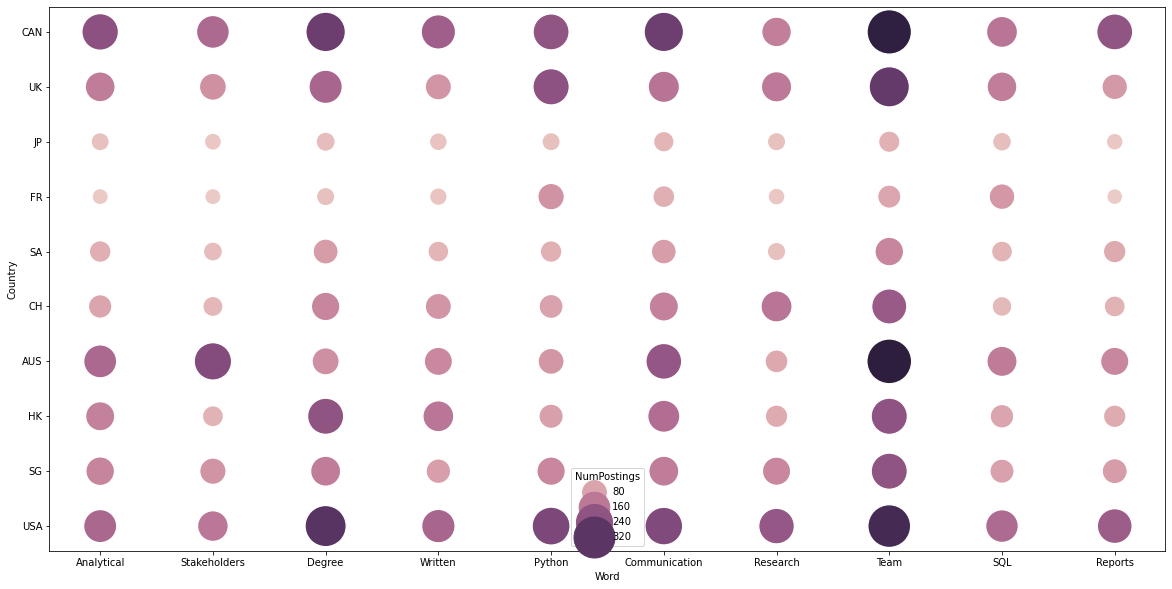

In [32]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_top_10.sort_values(by='NumPostings'), x="Word", y="Country", hue="NumPostings", size='NumPostings', sizes=(200, 2000))